In [1]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb

from scipy import stats


In [2]:
df = pd.read_csv('dengue_disease.csv')

In [3]:
df.head()

,age,gender,fever_type,platelet_count,white_blood_cell_count,presence_of_rash,dengue_serotype,platelet_production_rate,presence_of_bleeding,severity_of_symptoms,disease_severity,disease_status
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
# converting features to categorical features 

df['fever_type'][df['fever_type'] == 1] = 'Saddleback Fever'
df['fever_type'][df['fever_type'] == 2] = 'Biphasic Fever'
df['fever_type'][df['fever_type'] == 3] = 'Breakbone Fever'
df['fever_type'][df['fever_type'] == 4] = 'Rebound Fever'



df['dengue_serotype'][df['dengue_serotype'] == 0] = 'DENV-1'#low level
df['dengue_serotype'][df['dengue_serotype'] == 1] = 'DENV-2'#moderate level
df['dengue_serotype'][df['dengue_serotype'] == 2] = 'DENV-3'#high level
#df['dengue_serotype'][df['dengue_serotype'] == 3] = 'DENV-4' #outbreak level



df['disease_severity'][df['disease_severity'] == 1] = 'Mild Dengue'
df['disease_severity'][df['disease_severity'] == 2] = 'Moderate Dengue'
df['disease_severity'][df['disease_severity'] == 3] = 'Severe Dengue'

df["gender"] = df.gender.apply(lambda  x:'male' if x==1 else 'female')

In [5]:
df['fever_type'].value_counts()

fever_type
Rebound Fever       625
Breakbone Fever     283
Biphasic Fever      216
Saddleback Fever     66
Name: count, dtype: int64

In [6]:
df['dengue_serotype'].value_counts()

dengue_serotype
DENV-1    684
DENV-3    325
DENV-2    181
Name: count, dtype: int64

In [7]:
df['disease_severity'].value_counts()

disease_severity
Moderate Dengue    582
Mild Dengue        526
Severe Dengue       81
0                    1
Name: count, dtype: int64

In [8]:
#dropping row with disease_severity =0
df.drop(df[df.disease_severity ==0].index, inplace=True)
#checking distribution
df['disease_severity'].value_counts()

disease_severity
Moderate Dengue    582
Mild Dengue        526
Severe Dengue       81
Name: count, dtype: int64

In [9]:
df.head()

,age,gender,fever_type,platelet_count,white_blood_cell_count,presence_of_rash,dengue_serotype,platelet_production_rate,presence_of_bleeding,severity_of_symptoms,disease_severity,disease_status
0,40,male,Biphasic Fever,140,289,0,DENV-1,172,0,0.0,Mild Dengue,0
1,49,female,Breakbone Fever,160,180,0,DENV-1,156,0,1.0,Moderate Dengue,1
2,37,male,Biphasic Fever,130,283,0,DENV-2,98,0,0.0,Mild Dengue,0
3,48,female,Rebound Fever,138,214,0,DENV-1,108,1,1.5,Moderate Dengue,1
4,54,male,Breakbone Fever,150,195,0,DENV-1,122,0,0.0,Mild Dengue,0


In [10]:
## Checking missing entries in the dataset columnwise
df.isna().sum()

age                         0
gender                      0
fever_type                  0
platelet_count              0
white_blood_cell_count      0
presence_of_rash            0
dengue_serotype             0
platelet_production_rate    0
presence_of_bleeding        0
severity_of_symptoms        0
disease_severity            0
disease_status              0
dtype: int64

In [11]:
df.describe(include =[np.number])

,age,platelet_count,white_blood_cell_count,presence_of_rash,platelet_production_rate,presence_of_bleeding,severity_of_symptoms,disease_status
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [12]:
# Summary statistics of categorical columns
df.describe(include=['object'])

,gender,fever_type,dengue_serotype,disease_severity
count,1189,1189,1189,1189
unique,2,4,3,3
top,male,Rebound Fever,DENV-1,Moderate Dengue
freq,908,625,683,582


In [13]:
plot_criteria= ['fever_type', 'disease_status']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

disease_status,0,1
fever_type,,
Biphasic Fever,32.980000,4.940000
Breakbone Fever,34.400000,14.170000
Rebound Fever,25.310000,76.910000
Saddleback Fever,7.310000,3.980000


In [14]:
df_numeric = df[['age','platelet_count','white_blood_cell_count','platelet_production_rate']]

In [15]:
df_numeric.head()

,age,platelet_count,white_blood_cell_count,platelet_production_rate
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [16]:
import numpy as np
from scipy import stats

z = np.abs(stats.zscore(df_numeric))
z_array = z.values
print(z_array)

[[1.46626567 0.4281359  0.7752277  1.26430092]
 [0.5035987  1.51737007 0.29951621 0.63725935]
 [1.78715466 0.11648118 0.71606748 1.63576637]
 ...
 [0.35210527 0.11648118 0.78265797 0.96953469]
 [0.35210527 0.11648118 0.2526458  1.34268112]
 [1.68019167 0.31921249 0.34881639 1.30349102]]


In [17]:
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074], dtype=int64), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int64))


In [18]:
df = df[(z < 3).all(axis=1)]
df.shape

(1172, 12)

In [19]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,platelet_count,white_blood_cell_count,presence_of_rash,platelet_production_rate,presence_of_bleeding,severity_of_symptoms,disease_status,gender_male,fever_type_Breakbone Fever,fever_type_Rebound Fever,fever_type_Saddleback Fever,dengue_serotype_DENV-2,dengue_serotype_DENV-3,disease_severity_Moderate Dengue,disease_severity_Severe Dengue
0,40,140,289,0,172,0,0.0,0,True,False,False,False,False,False,False,False
1,49,160,180,0,156,0,1.0,1,False,True,False,False,False,False,True,False
2,37,130,283,0,98,0,0.0,0,True,False,False,False,True,False,False,False
3,48,138,214,0,108,1,1.5,1,False,False,True,False,False,False,True,False
4,54,150,195,0,122,0,0.0,0,True,True,False,False,False,False,False,False


In [20]:
df.shape

(1172, 16)

In [21]:
X = df.drop(['disease_status'],axis=1)
y = df['disease_status']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [23]:
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
disease_status
1    491
0    446
Name: count, dtype: int64
Distribution of traget variable in test set
disease_status
1    123
0    112
Name: count, dtype: int64


In [24]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(937, 15)
(937,)
------------Test Set------------------
(235, 15)
(235,)


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','platelet_count','white_blood_cell_count',
         'platelet_production_rate','severity_of_symptoms']] = scaler.fit_transform(X_train[['age','platelet_count',
                                                                  'white_blood_cell_count','platelet_production_rate','severity_of_symptoms']])
X_train.head()

,age,platelet_count,white_blood_cell_count,presence_of_rash,platelet_production_rate,presence_of_bleeding,severity_of_symptoms,gender_male,fever_type_Breakbone Fever,fever_type_Rebound Fever,fever_type_Saddleback Fever,dengue_serotype_DENV-2,dengue_serotype_DENV-3,disease_severity_Moderate Dengue,disease_severity_Severe Dengue
478,0.673469,0.193548,0.000000,1,0.303704,1,0.454545,True,False,True,False,False,False,False,True
253,0.673469,0.354839,0.594705,0,0.355556,1,0.194805,True,False,True,False,True,False,False,False
273,0.551020,0.516129,0.409369,0,0.466667,1,0.584416,True,False,True,False,False,False,True,False
111,0.591837,0.623656,0.519348,0,0.185185,1,0.584416,True,False,True,False,False,False,True,False
50,0.448980,0.408602,0.474542,0,0.400000,1,0.454545,True,False,True,False,False,False,True,False


In [26]:
X_test[['age','platelet_count','white_blood_cell_count','platelet_production_rate','severity_of_symptoms']] = scaler.transform(X_test[['age','platelet_count','white_blood_cell_count','platelet_production_rate','severity_of_symptoms']])
X_test.head()

,age,platelet_count,white_blood_cell_count,presence_of_rash,platelet_production_rate,presence_of_bleeding,severity_of_symptoms,gender_male,fever_type_Breakbone Fever,fever_type_Rebound Fever,fever_type_Saddleback Fever,dengue_serotype_DENV-2,dengue_serotype_DENV-3,disease_severity_Moderate Dengue,disease_severity_Severe Dengue
1024,0.693878,0.301075,0.572301,0,0.266667,0,0.376623,True,False,False,False,False,True,True,False
182,0.469388,0.408602,0.456212,0,0.614815,0,0.194805,True,False,False,False,False,False,False,False
785,0.346939,0.494624,0.480652,0,0.629630,1,0.220779,False,False,True,False,False,True,True,False
924,0.591837,0.623656,0.562118,0,0.333333,1,0.272727,True,False,True,False,False,True,True,False
780,0.612245,0.387097,0.527495,0,0.466667,1,0.584416,True,False,True,False,False,True,True,False


In [27]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [29]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
import xgboost as xgb

In [31]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, shuffle = True) #random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [32]:
models = GetBasedModel()
names, results = BasedLine2(X_train, y_train, models)

LR_L2: 0.855903 (0.038587)
LDA: 0.852734 (0.040877)
KNN7: 0.842004 (0.031743)
KNN5: 0.841993 (0.033610)
KNN9: 0.855937 (0.021412)
KNN11: 0.851556 (0.043190)
CART: 0.890105 (0.034896)
NB: 0.844200 (0.049335)
SVM Linear: 0.850606 (0.051303)
SVM RBF: 0.861210 (0.037696)
AB: 0.853821 (0.037461)
GBM: 0.892233 (0.019222)
RF_Ent100: 0.925315 (0.027315)
RF_Gini100: 0.933814 (0.022902)
ET100: 0.916724 (0.029013)
ET500: 0.924171 (0.025132)
MLP: 0.874068 (0.031225)
SGD3000: 0.831320 (0.031498)
XGB_2000: 0.929593 (0.031642)
XGB_500: 0.926378 (0.027130)
XGB_100: 0.920968 (0.028476)
XGB_1000: 0.914585 (0.033337)
ET1000: 0.919892 (0.028117)


In [35]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

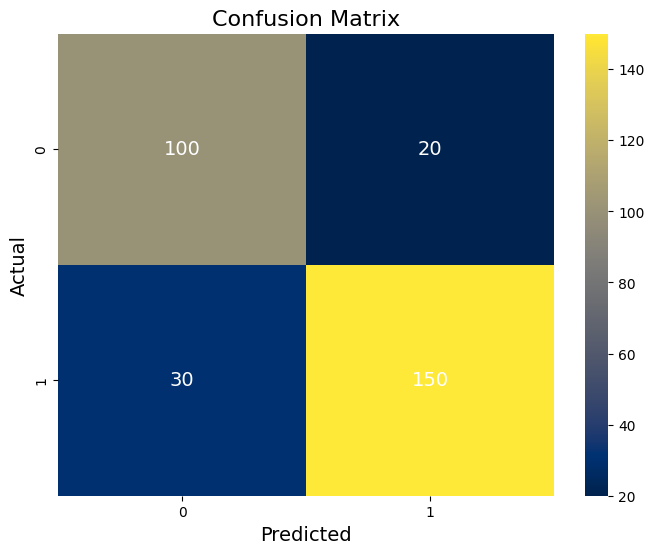

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.902128,0.862319,0.967480,0.833333,0.911877,0.898918,3.527677,0.809376


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, matthews_corrcoef

# Assuming you have calculated the confusion matrix CM beforehand
# Replace this placeholder with your actual confusion matrix
CM = [[100, 20], [30, 150]]

# Plot confusion matrix heatmap with custom color
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, cmap='cividis', fmt='g', annot_kws={"size": 14, "color": 'white'})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

# Calculating performance metrics
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN / (TN + FP)
loss_log = log_loss(y_test, y_pred_rfe)  # Assuming y_test and y_pred_rfe are defined
acc = accuracy_score(y_test, y_pred_rfe)
roc = roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)
mathew = matthews_corrcoef(y_test, y_pred_rfe)

# Create DataFrame with model results
model_results = pd.DataFrame(
    [['Random Forest', acc, prec, rec, specificity, f1, roc, loss_log, mathew]],
    columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'mathew_corrcoef'])

# Function to apply background color based on specific conditions
def apply_color(row):
    if row['Accuracy'] > 0.7:
        return ['background-color: lightgreen']*len(row)

# Apply color to each row based on conditions
styled_model_results = model_results.style.apply(apply_color, axis=1)

# Display the styled DataFrame
styled_model_results


In [43]:
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, matthews_corrcoef

In [44]:
scaler = MinMaxScaler()

In [45]:
X_train_scaled = scaler.fit_transform(X_train[['age', 'platelet_count', 'white_blood_cell_count', 'platelet_production_rate', 'severity_of_symptoms']])

In [46]:
X_test_scaled = scaler.transform(X_test[['age', 'platelet_count', 'white_blood_cell_count', 'platelet_production_rate', 'severity_of_symptoms']])

In [47]:
xgb_model = xgb.XGBClassifier(n_estimators=500)

In [48]:
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [50]:
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
logloss_xgb = log_loss(y_test, y_pred_xgb)
mcc_xgb = matthews_corrcoef(y_test, y_pred_xgb)

In [51]:
print("XGBoost Model Evaluation:")
print("Accuracy:", acc_xgb)
print("Precision:", prec_xgb)
print("Recall:", rec_xgb)
print("F1 Score:", f1_xgb)
print("ROC AUC Score:", roc_auc_xgb)
print("Log Loss:", logloss_xgb)
print("Matthews Correlation Coefficient:", mcc_xgb)

XGBoost Model Evaluation:
Accuracy: 0.8170212765957446
Precision: 0.7857142857142857
Recall: 0.8943089430894309
F1 Score: 0.8365019011406843
ROC AUC Score: 0.8132259001161442
Log Loss: 6.595221683966117
Matthews Correlation Coefficient: 0.637563444344372


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, matthews_corrcoef


In [53]:
rf_model = RandomForestClassifier(n_estimators=100)

In [54]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [55]:
y_pred_rf = rf_model.predict(X_test_scaled)

In [56]:
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
logloss_rf = log_loss(y_test, y_pred_rf)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)

In [57]:
print("Random Forest Model Evaluation:")
print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)
print("F1 Score:", f1_rf)
print("ROC AUC Score:", roc_auc_rf)
print("Log Loss:", logloss_rf)
print("Matthews Correlation Coefficient:", mcc_rf)

Random Forest Model Evaluation:
Accuracy: 0.851063829787234
Precision: 0.8098591549295775
Recall: 0.9349593495934959
F1 Score: 0.8679245283018868
ROC AUC Score: 0.8469439605110337
Log Loss: 5.368203696251491
Matthews Correlation Coefficient: 0.7087045941758758
